In [ ]:
pip install pandas --user

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys


In [28]:
df =  pd.read_csv(r'C:\Users\kibrahimm\visual_studio_workspace\github\data_science\datasets\supermarket.csv')

Exploratory Data Analysis


Data description : supermarket customers invoices
Questions : what makes customers spends more ? Does gender, payments methods or  customer_type influence the amount spent ?
Lignes et colonnes : 1000, 17
Types de variables : float, object, int
Nb of missing values : no null values


Data cleaning

In [29]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [31]:
df.shape

(1000, 17)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [33]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [34]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [35]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
df.duplicated().sum()

0

EDA

In [37]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [38]:
print(df['city'].value_counts())

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


In [39]:
print(df['product_line'].value_counts())

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


In [40]:
print(df['customer_type'].value_counts())

customer_type
Member    501
Normal    499
Name: count, dtype: int64


In [41]:
columns_drop =['time','cogs','gross_margin_percentage','gross_income','rating','tax_5%','date','unit_price','quantity','city','branch','invoice_id']
df.drop(columns_drop, axis=1, inplace=True)

In [19]:
#rename specific column names => df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

In [47]:
df['total']=df['total'].astype(int)

In [48]:
df.dtypes

customer_type    object
gender           object
product_line     object
total             int32
payment          object
dtype: object

In [49]:
df

,customer_type,gender,product_line,total,payment
0,Member,Female,Health and beauty,548,Ewallet
1,Normal,Female,Electronic accessories,80,Cash
2,Normal,Male,Home and lifestyle,340,Credit card
3,Member,Male,Health and beauty,489,Ewallet
4,Normal,Male,Sports and travel,634,Ewallet
...,...,...,...,...,...
995,Normal,Male,Health and beauty,42,Ewallet
996,Normal,Female,Home and lifestyle,1022,Ewallet
997,Member,Male,Food and beverages,33,Cash
998,Normal,Male,Home and lifestyle,69,Cash


Text(0.5, 1.0, 'Total spent by gender')

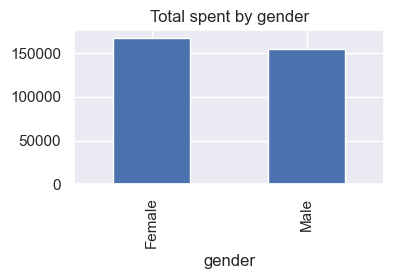

In [55]:
# total spent per gender

by_gender = df.groupby('gender')['total'].sum().astype(int).plot.bar(figsize=(4,2)).set_title('Total spent by gender')
by_gender

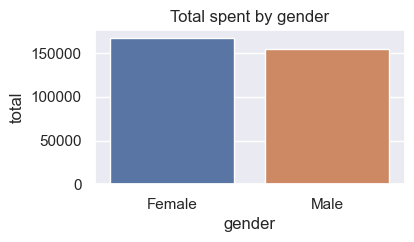

In [57]:
# OR

by_gender = df.groupby('gender')['total'].sum().astype(int).reset_index()

sns.barplot(x='gender', y='total', data=by_gender)
plt.xlabel('gender')
plt.ylabel('total')
plt.title('Total spent by gender')
sns.set(rc = {'figure.figsize':(2,4)})


### Correlation and Relatioship

In [61]:
df.columns

Index(['customer_type', 'gender', 'product_line', 'total', 'payment'], dtype='object')

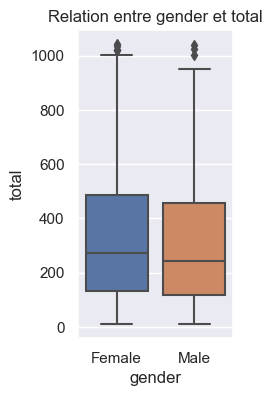

In [79]:
# Relationship between categorical variables and numerique variables
# More overlap in the box plots indicates less association while less overlap in the box plots indicates a stronger association.

sns.boxplot(x='gender', y='total', data=df)
plt.title('Relation entre gender et total')
plt.show()
sns.set(rc = {'figure.figsize':(2,4)})

Gender doesn't seem to infer.

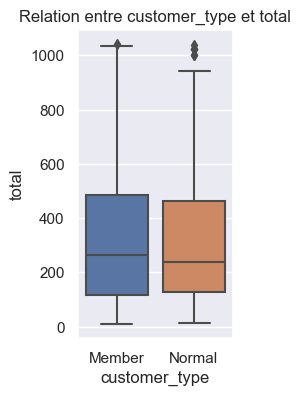

In [78]:
sns.boxplot(x='customer_type', y='total', data=df)
plt.title('Relation entre customer_type et total')
plt.show()
sns.set(rc = {'figure.figsize':(2,4)})

Beeing a member doesn't seem to infer in the total amount spent.

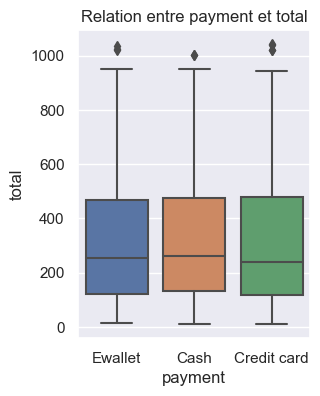

In [82]:
sns.boxplot(x='payment', y='total', data=df)
plt.title('Relation entre payment et total')
plt.show()
sns.set(rc = {'figure.figsize':(3,4)})

The mean of payment doesn't seem to infer with the amount spent.

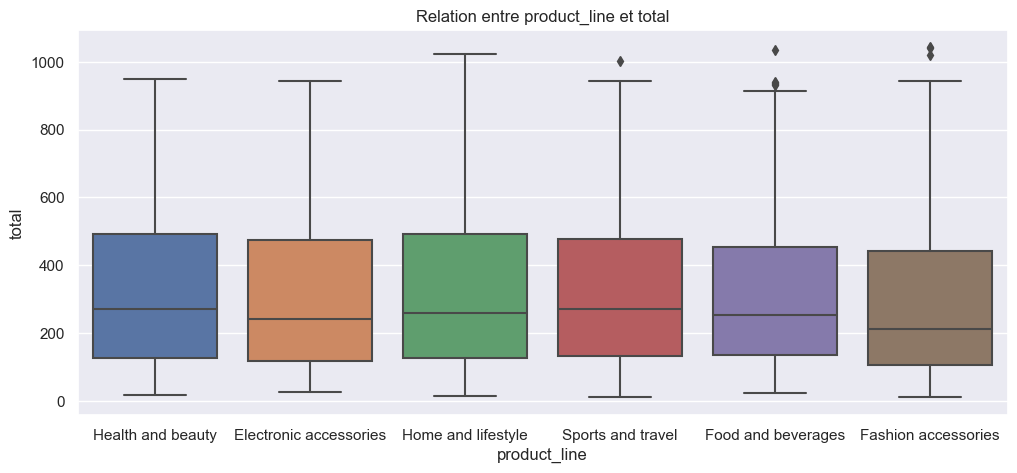

In [137]:
sns.boxplot(x='product_line', y='total', data=df)
plt.title('Relation entre product_line et total')
plt.show()
sns.set(rc = {'figure.figsize':(25,5)})

## Encoding

In [101]:
df['product_line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [102]:
encoded = {"gender":     {"Female": 1, "Male": 2},
                "customer_type": {"Member": 1, "Normal": 2},
                    "payment": {"Ewallet": 1, "Cash": 2, "Credit card": 3},
                        "product_line": {"Health and beauty": 1, "Electronic accessories": 2, "Home and lifestyle": 3, "Sports and travel": 4, "Food and beverages": 5, "Fashion accessories": 6}}

In [103]:
df_encoded = df.replace(encoded)

df_encoded.head()

,customer_type,gender,product_line,total,payment
0,1,1,1,548,1
1,2,1,2,80,2
2,2,2,3,340,3
3,1,2,1,489,1
4,2,2,4,634,1


In [111]:
# Calculation of corr and p-value

import numpy as np
from scipy import stats

correlation, pvalue = stats.pearsonr(df_encoded['gender'], df_encoded['total'])
print('Corrélation :', correlation)
print('P-value :', pvalue)

Corrélation : -0.04947977373434486
P-value : 0.11789069644318581


The correlation coefficient between gender and total is -0.049, which suggests a weak negative correlation between the two variables. However, the p-value of 0.118 is greater than the significance level of 0.05, indicating that there is not enough evidence to reject the null hypothesis that there is no correlation between the two variables. Typically, the significance level (alpha) is set to 0.05, which means that there is a 5% chance of observing a correlation as strong as the one in the sample data by chance alone, assuming that the null hypothesis is true.

<Axes: >

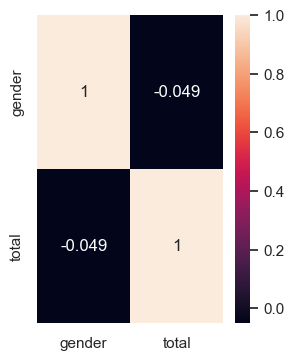

In [130]:
#Correlaion entre Gender et Total

# Compute the correlation matrix
df_gt =  df_encoded[['gender','total']]

corr_gender = df_gt.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_gender,annot=True)
